In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import gzip

# 1.1 Birth Rates

The data on US births, provided by the CDC is in `data/births.csv`.

Reproduce the following plot of births by gender over time given the data:

![](births_gender.png)

Note the `1e6` on the y axis for scale

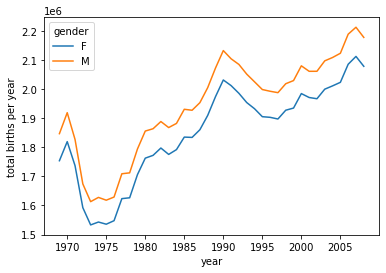

In [2]:
df = pd.read_csv('data/births.csv')
F = df.loc[df.gender == "F"]
M = df.loc[df.gender == "M"]
F = F.groupby(['year']).sum()
M = M.groupby(['year']).sum()
plt.plot(F.index, F.births, label='F')
plt.plot(M.index, M.births, label='M')
plt.legend(title='gender')
plt.xlabel('year')
plt.ylabel('total births per year')
plt.show()

# 1.2 Births anomalies

This was analyzed by beloved statistician Andrew Gelman [here](http://andrewgelman.com/2012/06/14/cool-ass-signal-processing-using-gaussian-processes/), leading to this plot:

![](births_gp100.png)

Explain all three plots in Gelman's figure. 

**1.2:** What is the periodic component? What is the residual? Use your research skills to learn then explain it (in english).

*1.2 answer*

The first plot clearly displays the mean births on a daily basis; the listed dates appear to be popular american holidays (note July 4). Feb 29 is mentioned and multiplied by 4 due to being a leap year effect. Interestingly, a lot of people are born in late summer/early autumn
The periodic component appears to have a correlation with the slope of the first graph. The larger the period, the more positive the slope and vice versa. The constant shifts up and down are accurate too as the first graph does not have consistent ups and downs but moreso smaller ups and downs throughout with major shifts over time.
The residual seems to be related to the first chart and deviation of births from the smoothed line (which also appears to be the floating average). That would explain why most of the values are hovering near zero but the days which have significant drops in the first chart, there are similar drops in the residual chart.

# 1.3 Holiday Anomalies Plot

Reproduce *as best you can* the first of the 3 figures from Andrew Gelman's blog post (your plot may have small differences)

**1.3.1:** Reproduce the births line in a plot. Hint: Make the x axis a `pd.datetime` object

**1.3.2:** Reproduce the `smoothed` line. Hint: use a rolling window average

**1.3.3:** Reproduce the entire figure with the mean line as a horizontal. You can make the y axis total births instead of a % deviation from mean axis (they'll look the same anyway)

Text(0, 0.5, 'total births')

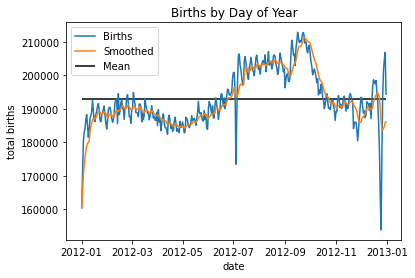

In [3]:
df = pd.read_csv('http://chmullig.com/wp-content/uploads/2012/06/births.csv')
df = df.drop([60, 61, 123, 185, 278, 340], axis=0) #drop all the weird values (e.g. feburary 31)
df = df.replace(46420, 46420 * 4) ## Feb 29
df['date'] = pd.to_datetime(str(2012) + "-" + df.month.astype(str) + "-" + df.day.astype(str))
df['MA'] = df.births.rolling(10, min_periods=1).mean()
plt.plot(df.date, df.births, label='Births')
plt.plot(df.date, df.MA, label='Smoothed')
##cheated a little by using the index of the first and late dates for xmin & xmax
plt.hlines(df.births.mean(), df.date[0], df.date[371], label="Mean")
plt.legend()
plt.title('Births by Day of Year')
plt.xlabel('date')
plt.ylabel('total births')

# 2. Recipe Database

### 2.1 

Load the JSON recipe database we saw in lecture 4.

How many of the recipes are for breakfast food? Hint: The `description` would contain the work "breakfast"

In [4]:
with gzip.open('data/recipe.json.gz','r') as f:
    data = (line.strip().decode() for line in f)
    data_json = f"[ {','.join(data)} ]"
    
recipes = pd.read_json(data_json)
recipes['breakfast'] = recipes["description"].str.contains("breakfast", case=False, na=False).astype(int)
len(recipes.loc[recipes.breakfast == 1])

3524

### 2.2 A simple recipe recommender

Let's build a recipe recommender: given a list of basic ingredients, find a recipe that uses all those ingredients.

Here is the list of ingredients that can be asked for:

```
['salt', 'pepper', 'oregano', 'sage', 'parsley',
 'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']
```

**Hint:** Build a new column for each of the ingredients that indicates whether that ingredient is in the recipe.

**example:**
```
recommend_ingredients(["parsley", "paprika", "tarragon"], df)

result: 
# The rows where these 3 ingredients are in the recipe
[2069, 74964, 93768, 113926, 137686, 140530, 158475, 158486, 163175, 165243]
```

In [5]:
recipes['salt'] = recipes["ingredients"].str.contains("salt", case = False, na = False).astype(int)
recipes['pepper'] = recipes["ingredients"].str.contains("pepper", case = False, na = False).astype(int)
recipes['oregano'] = recipes["ingredients"].str.contains("oregano", case = False, na = False).astype(int)
recipes['sage'] = recipes["ingredients"].str.contains("sage", case = False, na = False).astype(int)
recipes['parsley'] = recipes["ingredients"].str.contains("parsley", case = False, na = False).astype(int)
recipes['rosemary'] = recipes["ingredients"].str.contains("rosemary", case = False, na = False).astype(int)
recipes['tarragon'] = recipes["ingredients"].str.contains("tarragon", case = False, na = False).astype(int)
recipes['thyme'] = recipes["ingredients"].str.contains("thyme", case = False, na = False).astype(int)
recipes['paprika'] = recipes["ingredients"].str.contains("paprika", case = False, na = False).astype(int)
recipes['cumin'] = recipes["ingredients"].str.contains("cumin", case = False, na = False).astype(int)
recipes.loc[(recipes.salt == 1) & 
            (recipes.pepper == 1) & 
            (recipes.oregano == 1) & 
            (recipes.sage == 1) & 
            (recipes.parsley == 1) & 
            (recipes.rosemary == 1) & 
            (recipes.tarragon == 1) & 
            (recipes.thyme == 1) & 
            (recipes.paprika == 1) & 
            (recipes.cumin == 1)]
#seems there are no recipes with all the particular ingredients

,_id,name,ingredients,url,image,ts,cookTime,source,recipeYield,datePublished,...,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin


# 3. Movies!

Recall the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) from lecture 4. It's made up of several tables which we've played with in lecture 4.

The tables have common columns (`id` and `movie_id`) around which you can merge and join tables.

### 3.1 best director

Your task is to find **The best director** in terms of average ratings of his movies. This can be from the `ratings` or `ratings_small` table, or simply the vote average in the `metadata` table. The director can be found in the `cast` table.

You will have to use all of your skills to get this done, between using groupbys and merging multiple tables together

In [6]:
## Downloaded the respective files from the kaggle link instead of using the website method from class
movies = pd.read_csv('data/movies_metadata.csv', low_memory=False)
credits = pd.read_csv('data/credits.csv', dtype=None)
movies.id = pd.to_numeric(movies.id, errors = 'coerce')
mc = pd.merge(movies, credits, on='id')
directors = []
for i in range(len(mc)):
    drctr = []
    dicts = eval(mc.crew[i])
    for j in range(len(dicts)):
        if dicts[j]['job'] == 'Director':
            drctr.append(dicts[j]['name'])
    directors.append(drctr)
mc['directors'] = directors
s = mc.apply(lambda x: pd.Series(x['directors'], dtype=str), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'director'
mc = mc.drop('directors', axis=1).join(s)
mc.groupby(['director'])['vote_average'].mean().idxmax()

'A.W. Vidmer'